<a href="https://colab.research.google.com/github/Aefano23/Dataframe_Project_Sosmed_Data/blob/main/Aditya_Efano_Putra_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load file csv ke dataframe dari link gdrive dibawah ini:
1. url_account_twitter_pos
https://drive.google.com/file/d/1fAffSVhEydpL3VngA2yYpBgEWrO0BMHR/view?usp=sharing
2. url_hashtag_twitter_pos
https://drive.google.com/file/d/1tvfuP3SoSci81OhEw2J5bLijUdaAqCpg/view?usp=sharing
3. url_instagram_pos
https://drive.google.com/file/d/1SKlwa2XnpoZ6QCQxNpL5g6lIrsapr3NK/view?usp=sharing

In [1]:
import pandas as pd

url_account_twitter_pos = 'https://drive.google.com/file/d/1fAffSVhEydpL3VngA2yYpBgEWrO0BMHR/view?usp=sharing'
url_hashtag_twitter_pos = 'https://drive.google.com/file/d/1tvfuP3SoSci81OhEw2J5bLijUdaAqCpg/view?usp=sharing'
url_instagram_pos = 'https://drive.google.com/file/d/1SKlwa2XnpoZ6QCQxNpL5g6lIrsapr3NK/view?usp=sharing'


url_basic_drive = 'https://drive.google.com/uc?id='
url_account_twitter_pos = url_basic_drive + url_account_twitter_pos.split('/')[-2]
url_hashtag_twitter_pos = url_basic_drive + url_hashtag_twitter_pos.split('/')[-2]
url_instagram_pos = url_basic_drive + url_instagram_pos.split('/')[-2]

df_account_twitter_pos = pd.read_csv(url_account_twitter_pos)
df_hashtag_twitter_pos = pd.read_csv(url_hashtag_twitter_pos)
df_instagram_pos = pd.read_json(url_instagram_pos)

# Process data twitter

Gabungkan data twitter:
- url_account_twitter_pos
- url_hashtag_twitter_pos


In [2]:
df1 = df_account_twitter_pos[['link','date','time','hashtags']]
df2 = df_hashtag_twitter_pos[['link','date','time','hashtags']]

data_twitter = pd.concat([df1,df2])



Pada dataframe twitter yang telah digabung, tambahkan kolom `datetime`, kolom `datetime` diambil dari:
- kolom `date`
- kolom `time`

In [6]:
data_twitter['datetime'] = data_twitter['date'] + ' ' + data_twitter['time']

Select kolom:
- `link`
- `datetime`, ubah menjadi format `yyyy-mm-dd h:m:s`
- `hashtags`, rename kolom menjadi `content`

Pada dataframe twitter yang telah ditambah kolom `datetime`, lalu filter kolom `content` yang tidak berisi `[]` dan jangan lupa reset index

In [7]:

data_twitter.rename(columns = {'hashtags':'content'}, inplace=True)

data_twitter['date'] = pd.to_datetime(data_twitter['date'])
data_twitter['date'] = data_twitter['date'].dt.strftime('%Y-%m-%d')

data_twitter['time'] = pd.to_datetime(data_twitter['time'])
data_twitter['time'] = data_twitter['time'].dt.strftime('%H:%M:%S')


twitter_filter = data_twitter[~data_twitter['content'].str.contains('\\[]')].reset_index()
twitter_filter[['link','datetime','content']]



,link,datetime,content
0,https://twitter.com/PosIndonesia/status/114989...,2019-07-13 11:07:58,"['#posinaja', '#bumnhadiruntuknegeri']"
1,https://twitter.com/PosIndonesia/status/114961...,2019-07-12 16:55:01,"['#orangerinaja', '#posinaja', '#posindonesia'..."
2,https://twitter.com/PosIndonesia/status/114950...,2019-07-12 09:25:08,"['#harikoperasi', '#posinaja']"
3,https://twitter.com/PosIndonesia/status/114918...,2019-07-11 12:24:09,"['#poltekpos', '#posinaja']"
4,https://twitter.com/PosIndonesia/status/114912...,2019-07-11 08:22:01,"['#ulangtahun', '#happybirthday', '#posinaja',..."
...,...,...,...
20654,https://twitter.com/PosIndonesia/status/982213...,2011-08-02 09:39:21,['#agenpos']
20655,https://twitter.com/infoPKU/status/33856066869...,2011-02-05 18:54:50,['#agenpos']
20656,https://twitter.com/infoPKU/status/33667611459...,2011-02-05 06:25:58,['#agenpos']
20657,https://twitter.com/PosIndonesia/status/152891...,2010-12-16 13:16:36,['#agenpos']


Tambahkan kolom baru `source` dengan value `twitter`

Ekspetasi output dataframe:

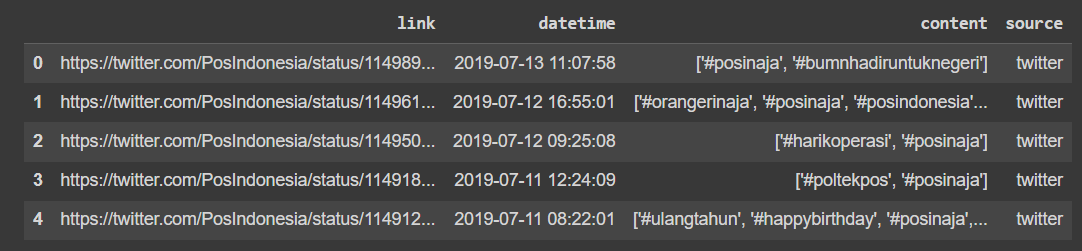

In [8]:
twitter_filter['source'] = 'twitter'
twitter_fix = twitter_filter[['link','datetime','content','source']]
twitter_fix

,link,datetime,content,source
0,https://twitter.com/PosIndonesia/status/114989...,2019-07-13 11:07:58,"['#posinaja', '#bumnhadiruntuknegeri']",twitter
1,https://twitter.com/PosIndonesia/status/114961...,2019-07-12 16:55:01,"['#orangerinaja', '#posinaja', '#posindonesia'...",twitter
2,https://twitter.com/PosIndonesia/status/114950...,2019-07-12 09:25:08,"['#harikoperasi', '#posinaja']",twitter
3,https://twitter.com/PosIndonesia/status/114918...,2019-07-11 12:24:09,"['#poltekpos', '#posinaja']",twitter
4,https://twitter.com/PosIndonesia/status/114912...,2019-07-11 08:22:01,"['#ulangtahun', '#happybirthday', '#posinaja',...",twitter
...,...,...,...,...
20654,https://twitter.com/PosIndonesia/status/982213...,2011-08-02 09:39:21,['#agenpos'],twitter
20655,https://twitter.com/infoPKU/status/33856066869...,2011-02-05 18:54:50,['#agenpos'],twitter
20656,https://twitter.com/infoPKU/status/33667611459...,2011-02-05 06:25:58,['#agenpos'],twitter
20657,https://twitter.com/PosIndonesia/status/152891...,2010-12-16 13:16:36,['#agenpos'],twitter


# Process data instagram

Select kolom:
- `key`, rename kolom menjadi `link`
- `datetime`, ubah value menjadi `yyyy-mm-dd h:m:s`, example: `2019-07-12 09:55:09`
- `caption`, rename kolom menjadi `content`

In [9]:
df_instagram_pos['datetime'] = df_instagram_pos['datetime'].dt.strftime('%Y-%m-%d %H:%M:%S')

df_instagram_pos.rename(columns = {'key':'link','caption':'content'}, inplace = True)

df_instagram_pos[['link','datetime','content']]



,link,datetime,content
0,https://www.instagram.com/p/Bz18n9Dghlp/,2019-07-13 04:06:50,Oranger menjaga setiap kiriman sejak awal dije...
1,https://www.instagram.com/p/Bzz_rMJArgG/,2019-07-12 09:55:01,"Oranger, layanan penjemputan prima di tempat p..."
2,https://www.instagram.com/p/BzzLvgQA-Za/,2019-07-12 02:21:13,"Selamat hari koperasi, 12 Juli 2019.\nDi Indon..."
3,https://www.instagram.com/p/Bzw7X61A2DU/,2019-07-11 05:19:42,Kuliah? di @poltekposindonesia aja. Poltekpos ...
4,https://www.instagram.com/p/BzwgLAPlIfC/,2019-07-11 01:22:01,Selamat ulang tahun untuk Indofarma yang ke-10...
...,...,...,...
2995,https://www.instagram.com/p/BFtDgBMjezL/,2016-05-22 09:09:38,Sekarang nggak perlu bingung bayar iuran BPJS....
2996,https://www.instagram.com/p/BFsV7YEDe7X/,2016-05-22 02:31:24,"Selamat berakhir pekan, Sahabat Pos. #PosIndon..."
2997,https://www.instagram.com/p/BFqs8BODe3N/,2016-05-21 11:13:59,Layanan EMS cocok bagi Sahabat Pos yang suka b...
2998,https://www.instagram.com/p/BFqBLXYDe4X/,2016-05-21 04:51:36,Tiket mudik belum di tangan? Naik pesawat atau...


Tambah kolom baru `source` dengan value `instagram`

Ekspetasi output:

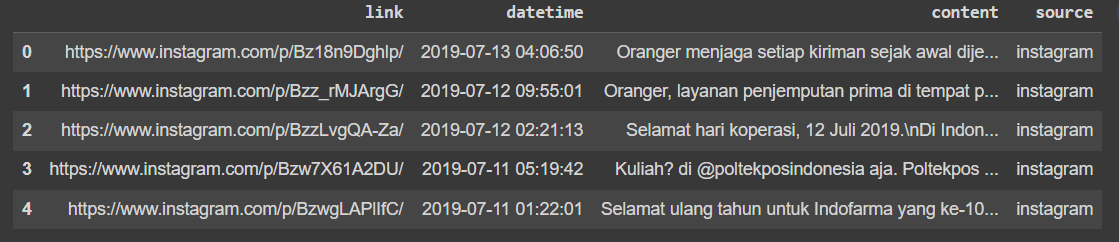

In [10]:
df_instagram_pos['source'] = 'instagram'
instagram_fix=df_instagram_pos[['link','datetime','content','source']]
instagram_fix

,link,datetime,content,source
0,https://www.instagram.com/p/Bz18n9Dghlp/,2019-07-13 04:06:50,Oranger menjaga setiap kiriman sejak awal dije...,instagram
1,https://www.instagram.com/p/Bzz_rMJArgG/,2019-07-12 09:55:01,"Oranger, layanan penjemputan prima di tempat p...",instagram
2,https://www.instagram.com/p/BzzLvgQA-Za/,2019-07-12 02:21:13,"Selamat hari koperasi, 12 Juli 2019.\nDi Indon...",instagram
3,https://www.instagram.com/p/Bzw7X61A2DU/,2019-07-11 05:19:42,Kuliah? di @poltekposindonesia aja. Poltekpos ...,instagram
4,https://www.instagram.com/p/BzwgLAPlIfC/,2019-07-11 01:22:01,Selamat ulang tahun untuk Indofarma yang ke-10...,instagram
...,...,...,...,...
2995,https://www.instagram.com/p/BFtDgBMjezL/,2016-05-22 09:09:38,Sekarang nggak perlu bingung bayar iuran BPJS....,instagram
2996,https://www.instagram.com/p/BFsV7YEDe7X/,2016-05-22 02:31:24,"Selamat berakhir pekan, Sahabat Pos. #PosIndon...",instagram
2997,https://www.instagram.com/p/BFqs8BODe3N/,2016-05-21 11:13:59,Layanan EMS cocok bagi Sahabat Pos yang suka b...,instagram
2998,https://www.instagram.com/p/BFqBLXYDe4X/,2016-05-21 04:51:36,Tiket mudik belum di tangan? Naik pesawat atau...,instagram


# (Output) Gabungkan data twitter dan instagram

Gabungkan dataframe twitter dan instagram, lalu drop duplicate data

In [11]:
df1 = twitter_fix
df2 = instagram_fix

combine= pd.concat([df1,df2]).drop_duplicates()

combine

,link,datetime,content,source
0,https://twitter.com/PosIndonesia/status/114989...,2019-07-13 11:07:58,"['#posinaja', '#bumnhadiruntuknegeri']",twitter
1,https://twitter.com/PosIndonesia/status/114961...,2019-07-12 16:55:01,"['#orangerinaja', '#posinaja', '#posindonesia'...",twitter
2,https://twitter.com/PosIndonesia/status/114950...,2019-07-12 09:25:08,"['#harikoperasi', '#posinaja']",twitter
3,https://twitter.com/PosIndonesia/status/114918...,2019-07-11 12:24:09,"['#poltekpos', '#posinaja']",twitter
4,https://twitter.com/PosIndonesia/status/114912...,2019-07-11 08:22:01,"['#ulangtahun', '#happybirthday', '#posinaja',...",twitter
...,...,...,...,...
2995,https://www.instagram.com/p/BFtDgBMjezL/,2016-05-22 09:09:38,Sekarang nggak perlu bingung bayar iuran BPJS....,instagram
2996,https://www.instagram.com/p/BFsV7YEDe7X/,2016-05-22 02:31:24,"Selamat berakhir pekan, Sahabat Pos. #PosIndon...",instagram
2997,https://www.instagram.com/p/BFqs8BODe3N/,2016-05-21 11:13:59,Layanan EMS cocok bagi Sahabat Pos yang suka b...,instagram
2998,https://www.instagram.com/p/BFqBLXYDe4X/,2016-05-21 04:51:36,Tiket mudik belum di tangan? Naik pesawat atau...,instagram


Output I: Grouping kolom `source` lalu hitung total raw

Ekspetasi output:

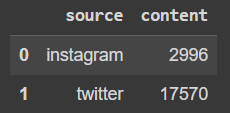

In [12]:
 combine.groupby(by='source')['content'].count().reset_index()


,source,content
0,instagram,2996
1,twitter,17570


Output II:
- Tambahkan kolom baru `year_month` ambil value dari kolom `datetime` dengan format `yyyy-mm`, example `2023-07`
- sort by `year_month` ascending
- Hasil akhir hitung total raw data source dari twitter dan instagram berdasarkan kolom `year_month`
- save dataframe ke file csv (reset index terlebih dahulu)

Ekspetasi output:

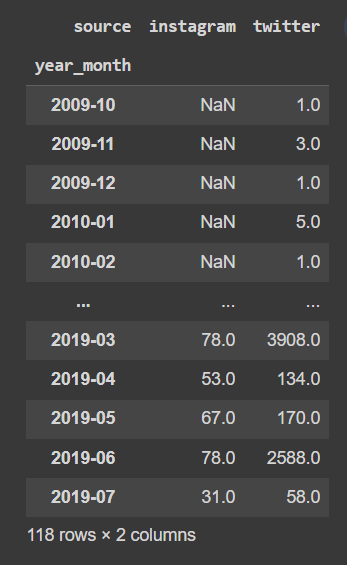

In [13]:
combine['datetime'] = pd.to_datetime(combine['datetime'])
combine['year_month'] = combine['datetime'].dt.strftime('%Y-%m')

grouping = combine.groupby(by=['year_month','source']).count().reset_index()

final = grouping.pivot(
    index = 'year_month',
    columns = 'source',
    values = 'content'
)

final

source,instagram,twitter
year_month,,
2009-10,NaN,1.0
2009-11,NaN,3.0
2009-12,NaN,1.0
2010-01,NaN,5.0
2010-02,NaN,1.0
...,...,...
2019-03,78.0,3908.0
2019-04,53.0,134.0
2019-05,67.0,170.0


Note:
Reset index dataframe sebelum simpan dataframe ke file csv

Ekspetasi output file:
https://drive.google.com/file/d/1PZnG84kZcdPFAMWMP7_o5VKHUyqHj904/view?usp=sharing

In [14]:
final.reset_index()
final.to_csv('final.csv')